In [ ]:
## How Important is the 3-pointer?
## Does a higher 3-pt% lead to more wins?
## Imported Team shooting and team records into python from nba_api
## Created a database in SQL to analyze NBA tea, data based on wins and 3-pt %
## Used joins and created new table with combined team records data and team shooting data
## Imported .csv below to analyze NBA team data
## Found that there is a correlation between higher 3-pt% and wins in the NBA

In [1]:
## Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

# Adjusts the configuration of the plots we will create 
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
## Read in the data

In [4]:
df = pd.read_csv(r'C:\Users\16606\Documents\stats_combined.csv')

In [5]:
## Looking at data

In [7]:
df

,TeamCity,TeamName,Conference,WINS,LOSSES,OppPointsPG,FG2_PCT,FG3_PCT
0,Phoenix,Suns,West,64,18,107.3,0.553,0.364
1,Miami,Heat,East,53,29,105.6,0.530,0.379
2,Boston,Celtics,East,51,31,104.5,0.547,0.356
3,Memphis,Grizzlies,West,56,26,109.9,0.518,0.353
4,Golden State,Warriors,West,53,29,105.5,0.557,0.366
5,Milwaukee,Bucks,East,51,31,112.1,0.545,0.366
6,Philadelphia,76ers,East,51,31,107.3,0.527,0.364
7,Dallas,Mavericks,West,52,30,104.7,0.548,0.350
8,Toronto,Raptors,East,48,34,107.1,0.503,0.349
9,Utah,Jazz,West,49,33,107.6,0.568,0.360


In [9]:
df = df.sort_values(by=['FG3_PCT'], inplace=False, ascending=False)
df

,TeamCity,TeamName,Conference,WINS,LOSSES,OppPointsPG,FG2_PCT,FG3_PCT
1,Miami,Heat,East,53,29,105.6,0.530,0.379
16,LA,Clippers,West,42,40,108.4,0.514,0.376
15,Atlanta,Hawks,East,43,39,112.4,0.531,0.374
10,Chicago,Bulls,East,46,36,112.0,0.535,0.369
18,Charlotte,Hornets,East,43,39,114.9,0.541,0.366
4,Golden State,Warriors,West,53,29,105.5,0.557,0.366
5,Milwaukee,Bucks,East,51,31,112.1,0.545,0.366
0,Phoenix,Suns,West,64,18,107.3,0.553,0.364
6,Philadelphia,76ers,East,51,31,107.3,0.527,0.364
12,Brooklyn,Nets,East,44,38,112.1,0.538,0.361


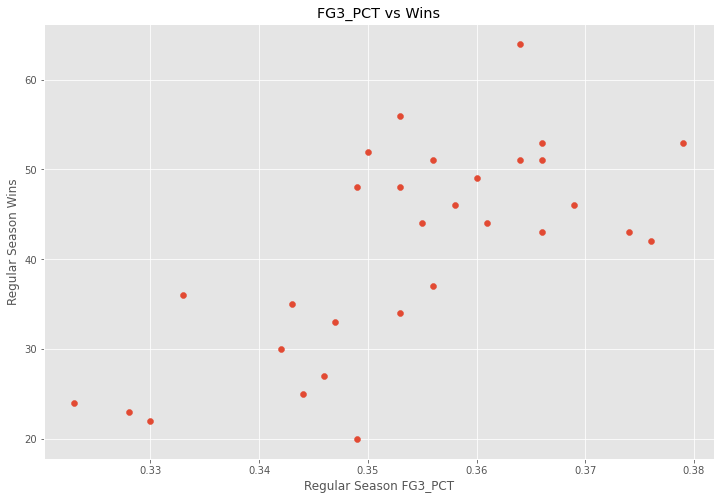

In [11]:
plt.scatter(x=df['FG3_PCT'], y=df['WINS'])

plt.title('FG3_PCT vs Wins')

plt.xlabel('Regular Season FG3_PCT')

plt.ylabel('Regular Season Wins')

plt.show()

<AxesSubplot:xlabel='FG3_PCT', ylabel='WINS'>

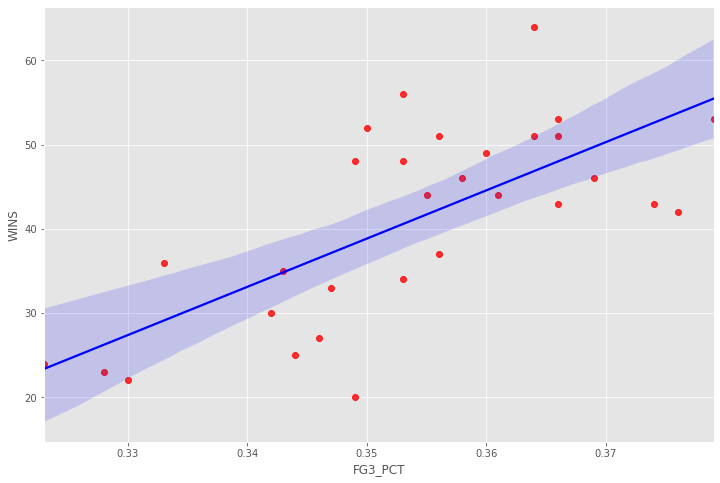

In [12]:
sns.regplot(x='FG3_PCT', y='WINS', data = df, scatter_kws = {"color": "red"}, line_kws = {"color": "blue"})

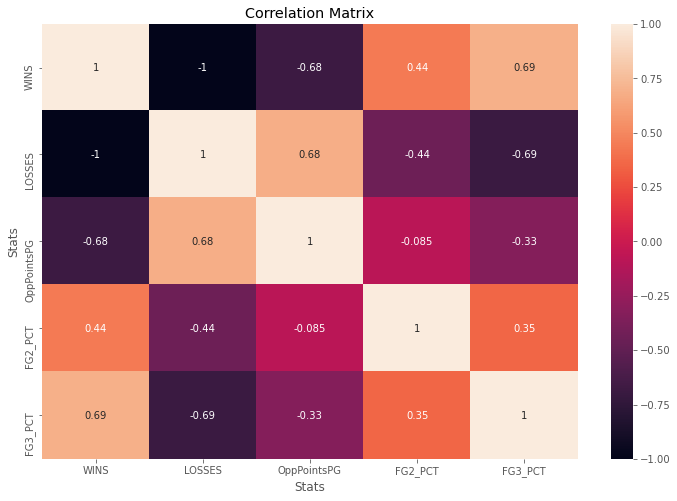

In [13]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix')

plt.xlabel('Stats')

plt.ylabel('Stats')

plt.show()